<a href="https://colab.research.google.com/github/TruptiGujarathi87/MachineLearning/blob/main/TruptiG_67_MLExam_FraudulentCCTransactions1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Import libraries
import pandas as pd
import numpy as np

In [3]:
#Upload the dataset and convert it to dataframe
df = pd.read_csv("/content/drive/MyDrive/creditcard_2023.csv")

In [4]:
#Top 5 rows in dataframe
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


As we can see, the column names of the dataset seem strange. To protect the user’s identity and the security of their confidential information, the dataset provider has applied PCA transformation on the original numerical features and compressed it into 28 principal components. Only one features have not been anonymized ie.Amount. The feature Class is the target column with user labels as 0-non-fraudulent and 1-fraudulent.

In [5]:
df.tail()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1
568629,568629,-0.795144,0.433236,-0.649140,0.374732,-0.244976,-0.603493,-0.347613,-0.340814,0.253971,...,0.534853,-0.291514,0.157303,0.931030,-0.349423,-1.090974,-1.575113,0.722936,21493.92,1


In [6]:
#Number of rows and columns in dataset
df.shape

(568630, 31)

In [7]:
#Detail information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

All the features in the dataset are numerical features and there are no null values present in the dataset. So we will not have to perform null-value handling on this dataset.

In [8]:
df.duplicated().sum()

0

No duplicate value is present in dataset.

id column is just like index, so no use. Drop it

In [9]:
df.drop('id', axis = 1, inplace = True)

#EDA

Text(0.5, 1.0, 'Distribution of Class \n 0: No Fraud 1: Fraud')

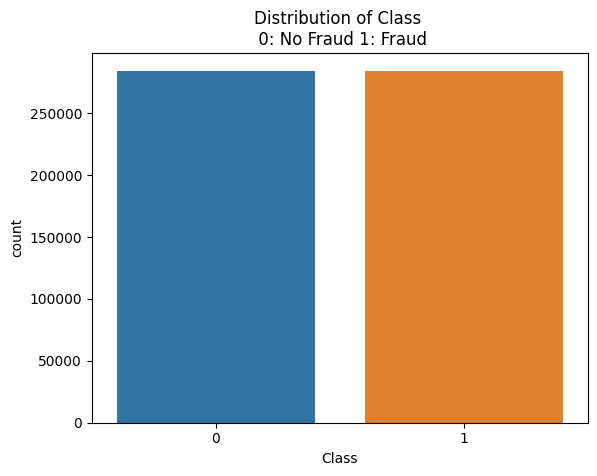

In [10]:
#Check the Target column value counts
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x = df['Class'], data = df)
plt.title('Distribution of Class \n 0: No Fraud 1: Fraud')

The Class column indicates whether a transaction is fraudulent or not, where 1 indicates fraud and 0 indicates non-fraud.

In [11]:
df['Amount'].describe()

count    568630.000000
mean      12041.957635
std        6919.644449
min          50.010000
25%        6054.892500
50%       12030.150000
75%       18036.330000
max       24039.930000
Name: Amount, dtype: float64

<Axes: >

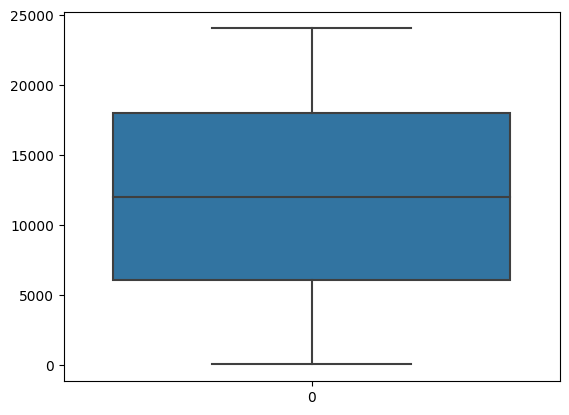

In [12]:
sns.boxplot(df['Amount'])

In [13]:
df_temp = df.drop('Class', axis = 1)


<ipython-input-14-2637651da24b>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(17,1))


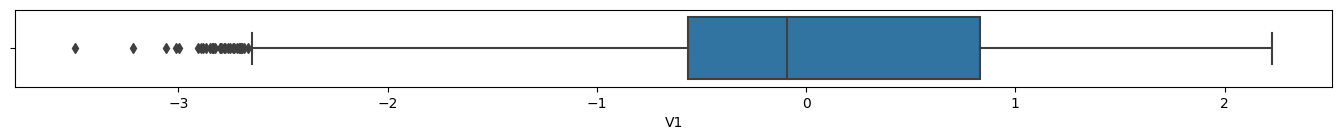

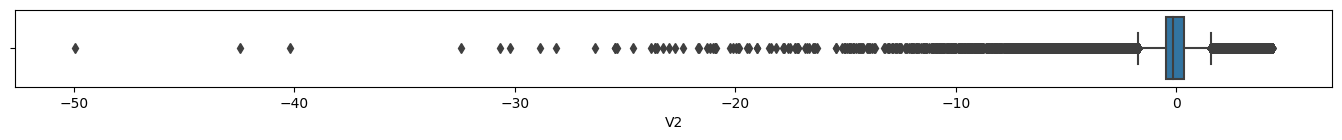

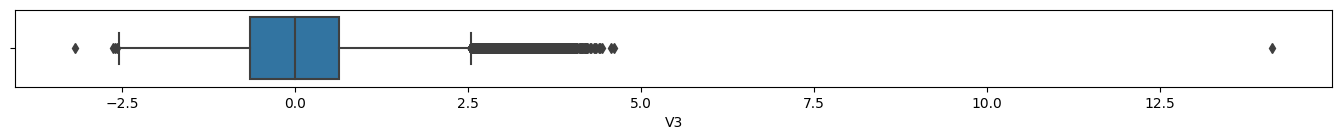

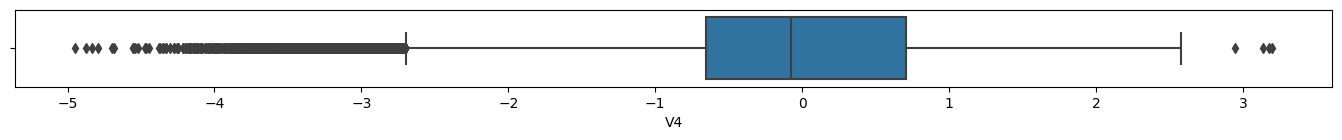

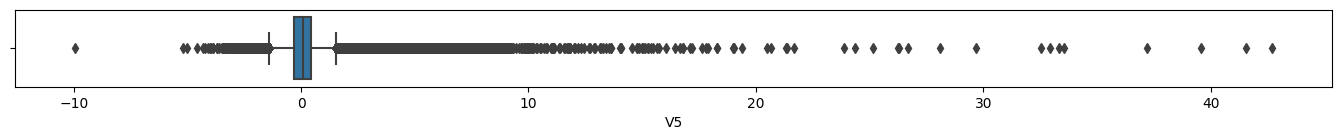

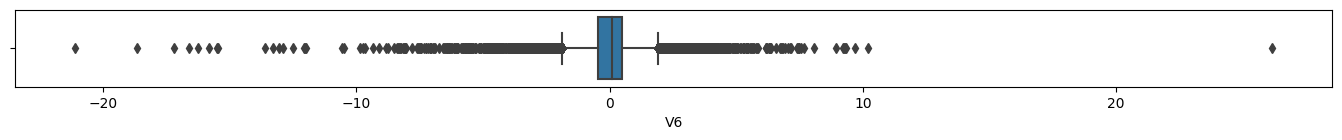

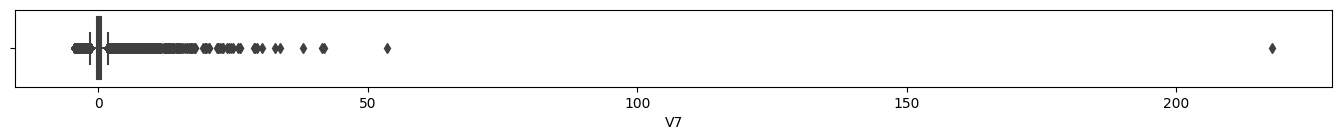

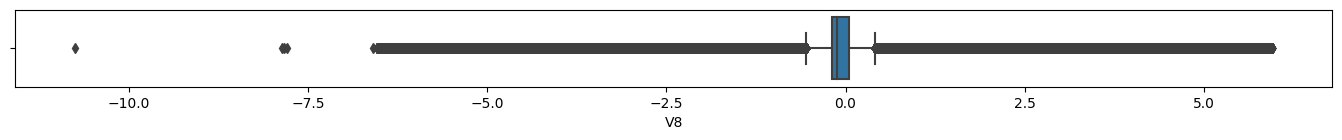

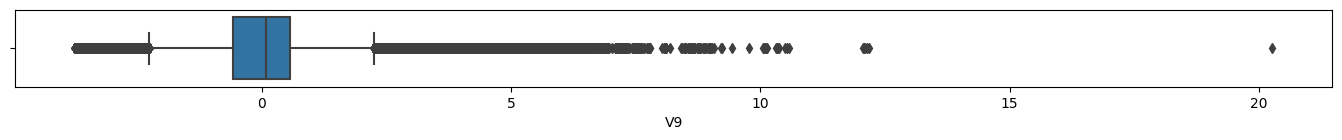

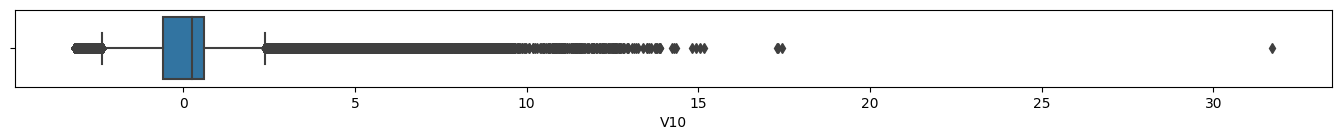

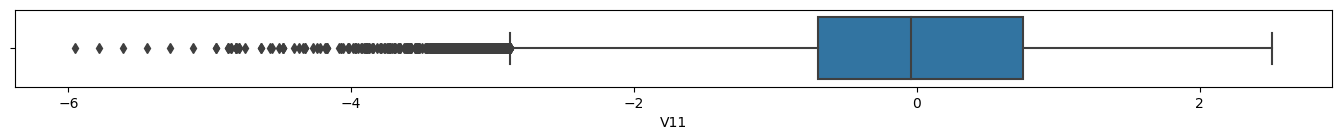

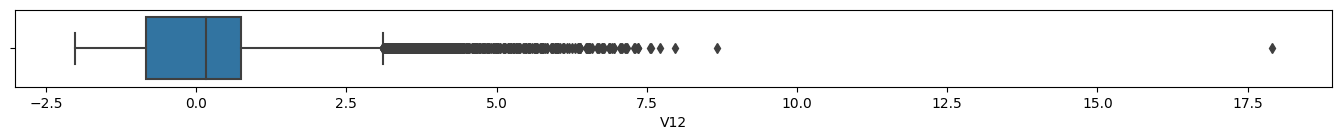

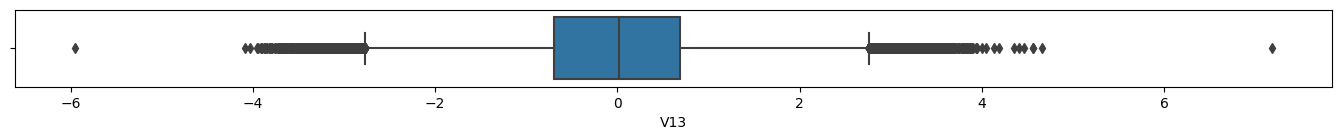

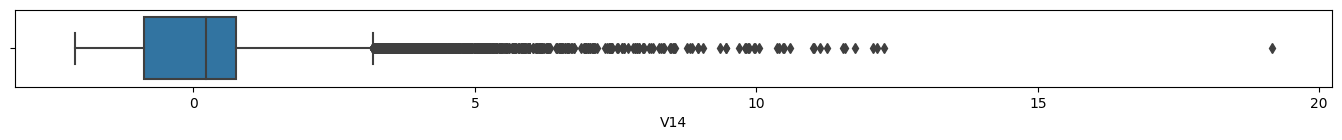

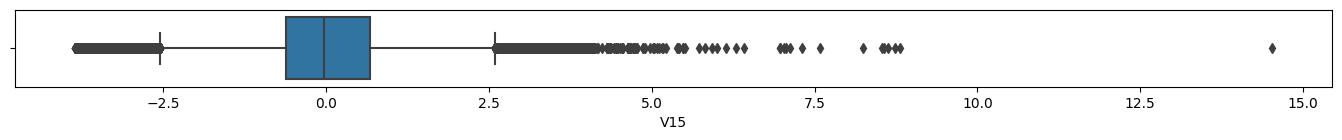

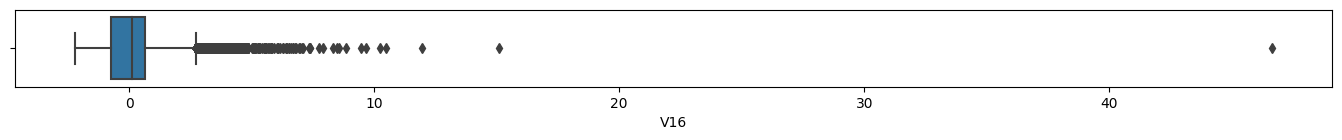

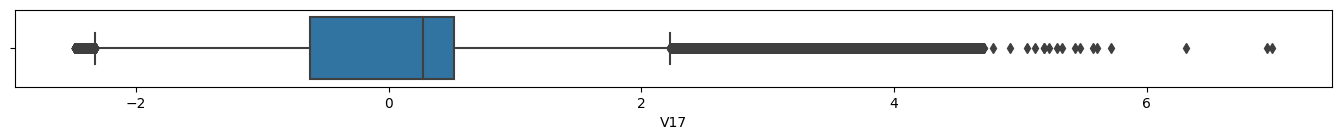

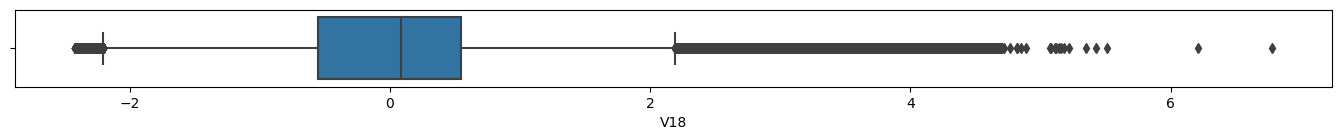

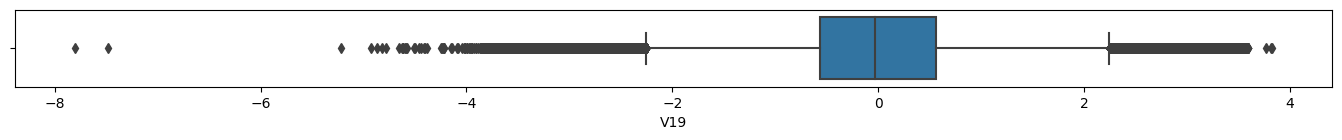

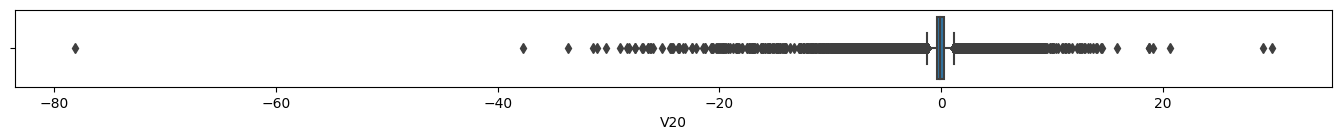

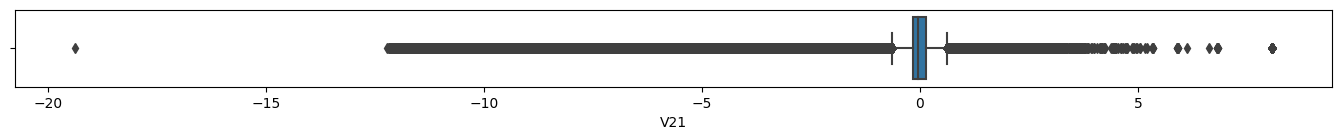

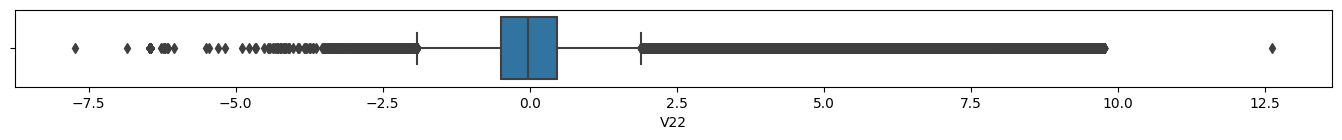

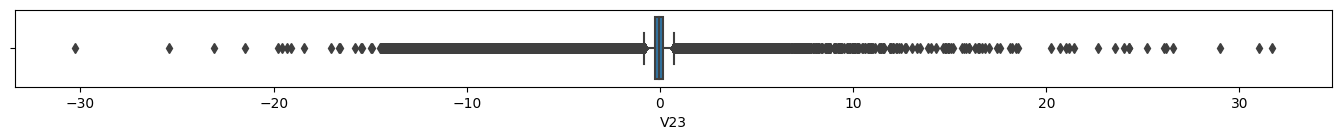

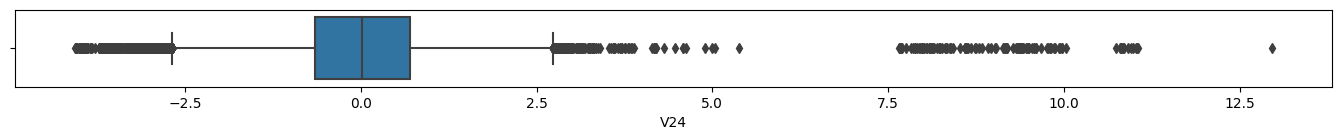

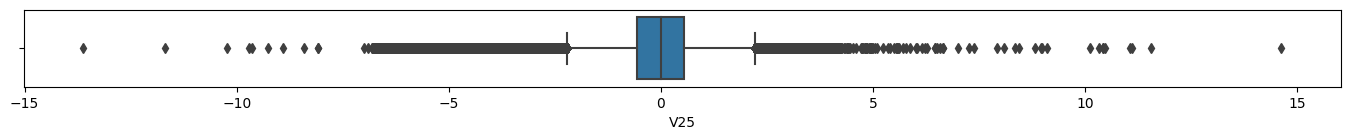

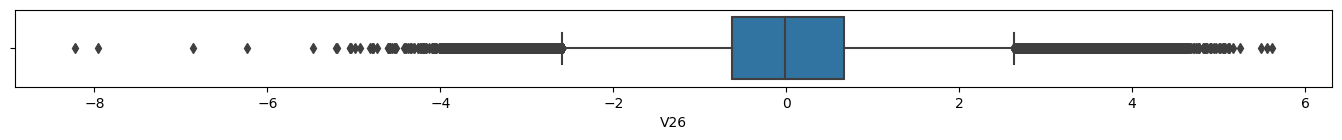

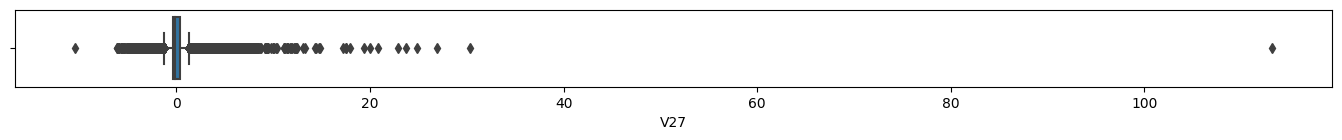

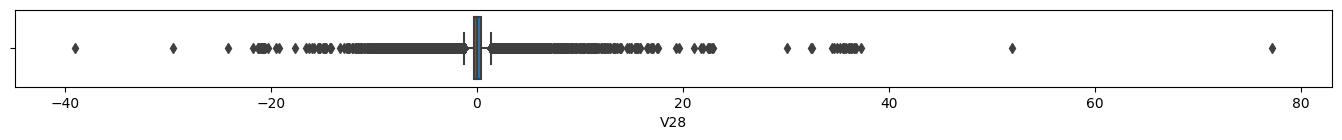

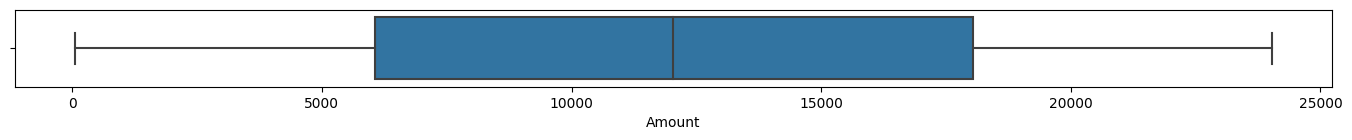

In [14]:
#Check the outliers in each variable
for column in df_temp:
        plt.figure(figsize=(17,1))
        sns.boxplot(data = df, x=column)

In [15]:
#replace the outliers
for col in df_temp:
    q1 = df_temp[col].quantile(0.25)
    q3 = df_temp[col].quantile(0.75)
    iqr = q3 - q1
    whisker_width = 1.5
    lower_whisker = q1 - (whisker_width * iqr)
    upper_whisker = q3 + whisker_width * iqr
    df_temp[col] = np.where(df_temp[col] > upper_whisker, upper_whisker, np.where(df_temp[col] < lower_whisker, lower_whisker, df_temp[col]))

<ipython-input-16-3fee0e68d728>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(17,1))


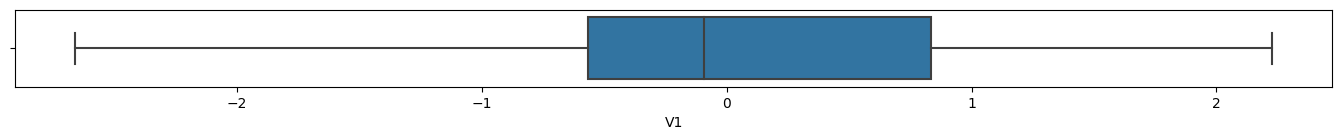

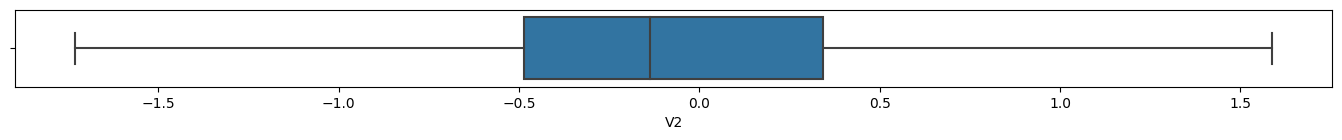

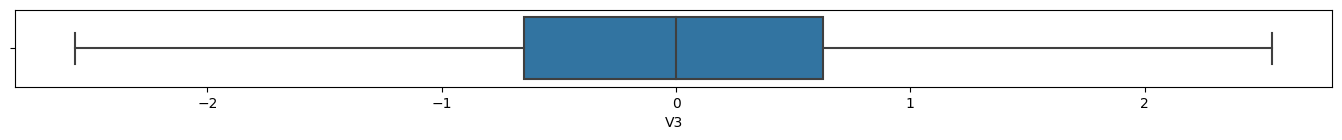

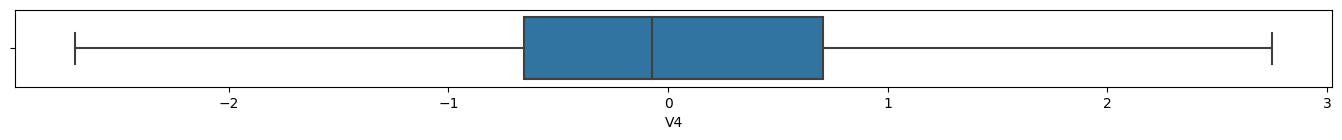

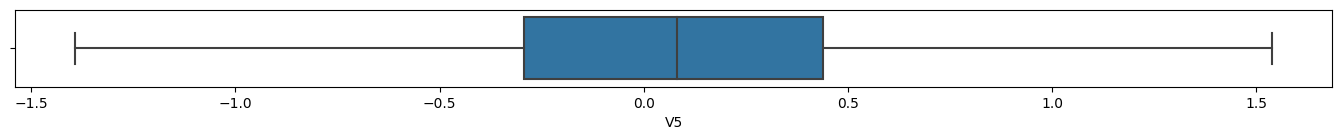

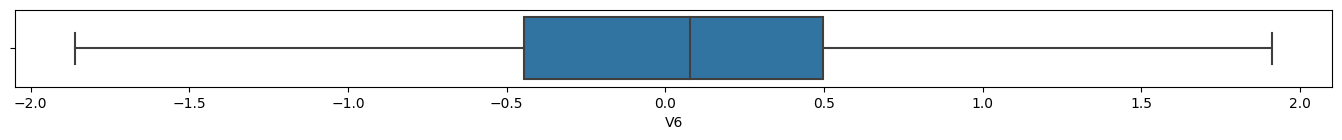

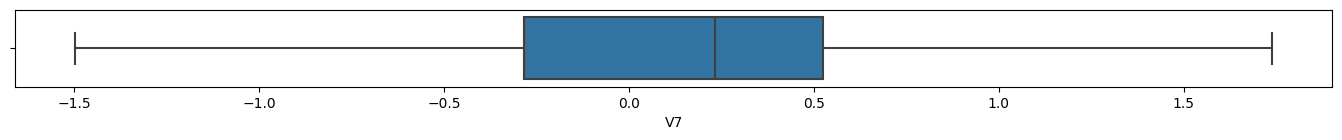

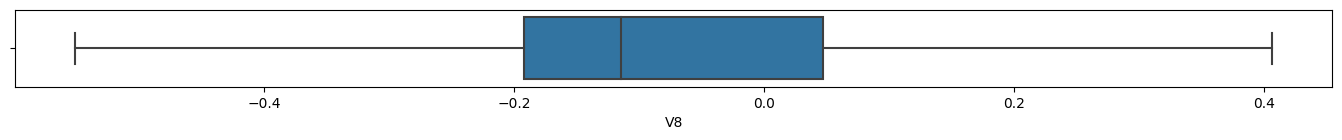

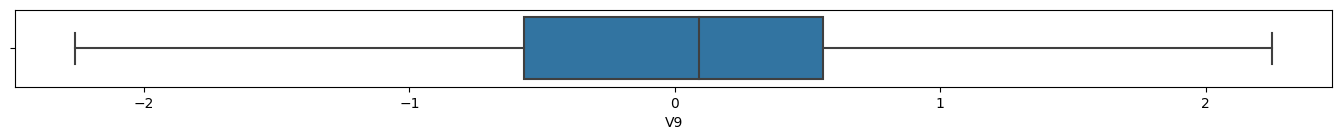

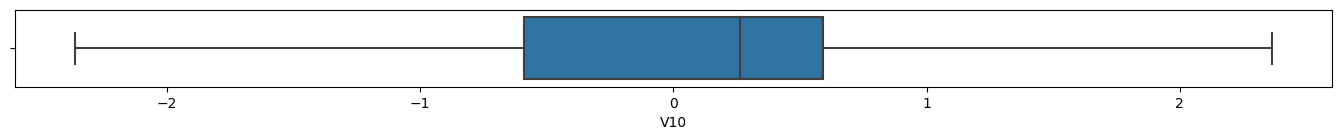

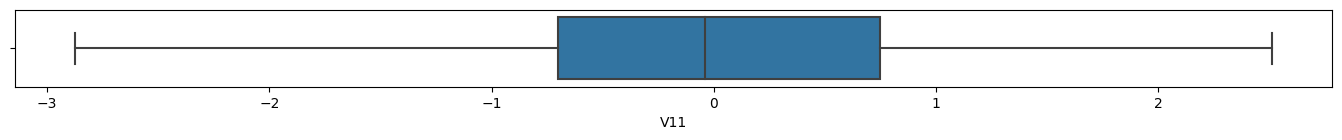

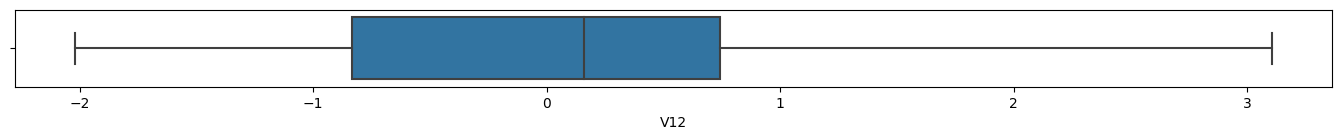

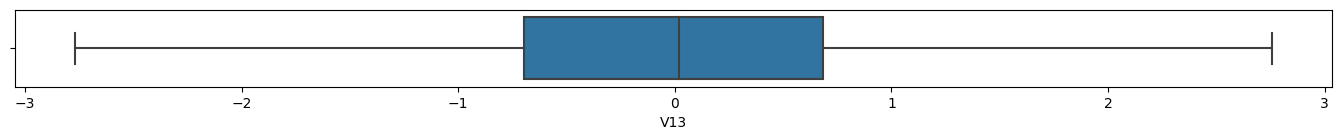

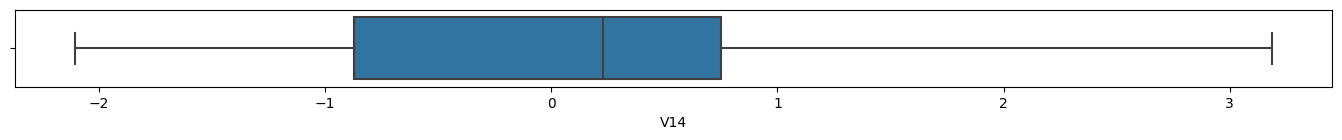

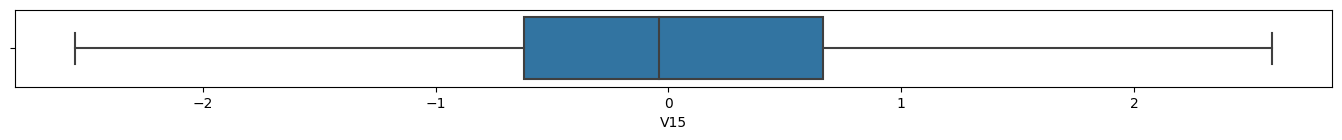

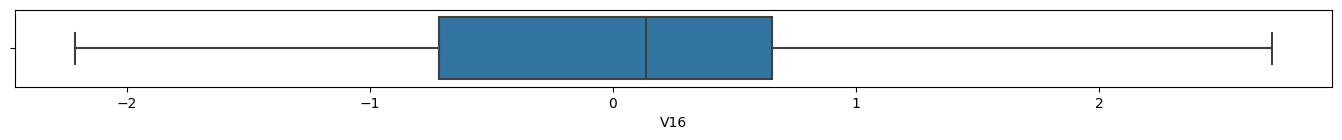

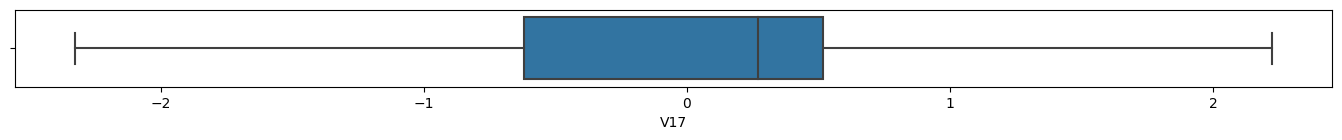

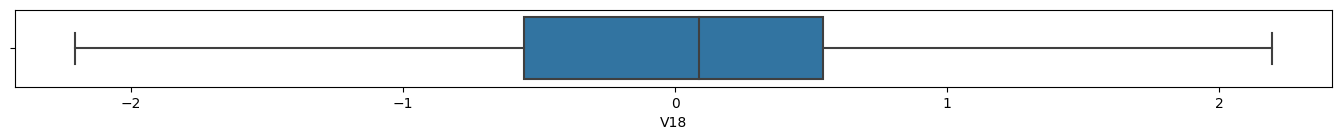

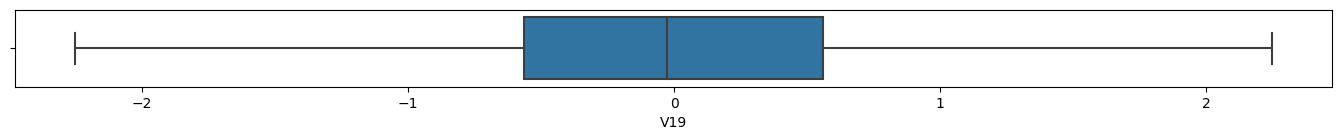

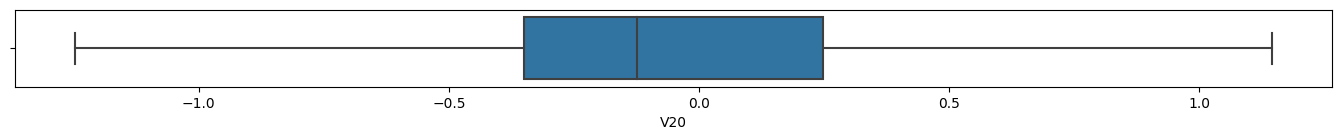

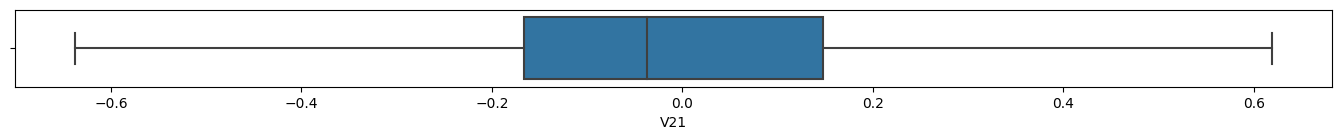

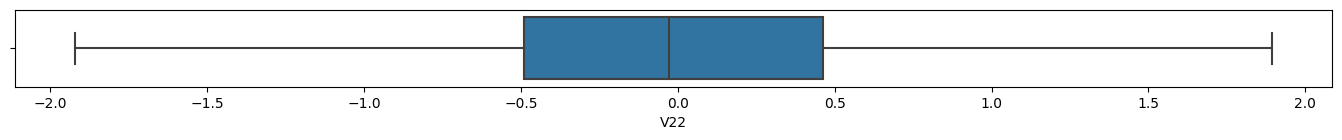

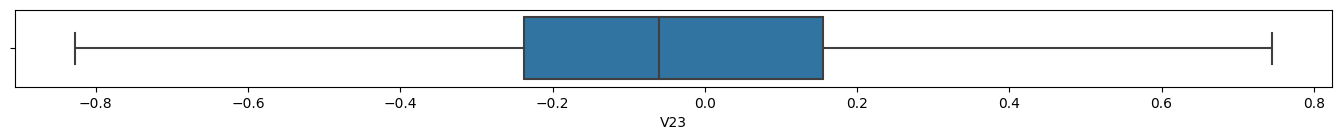

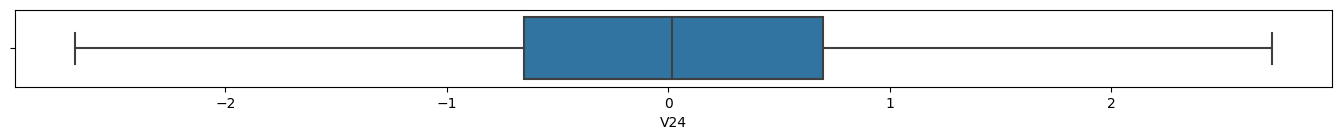

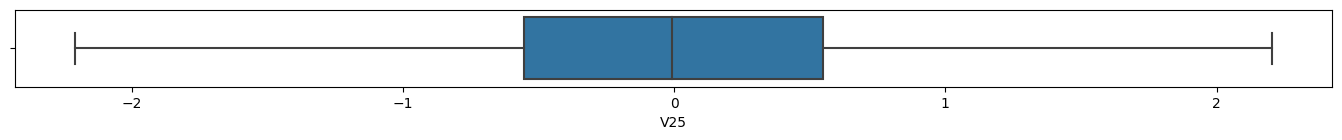

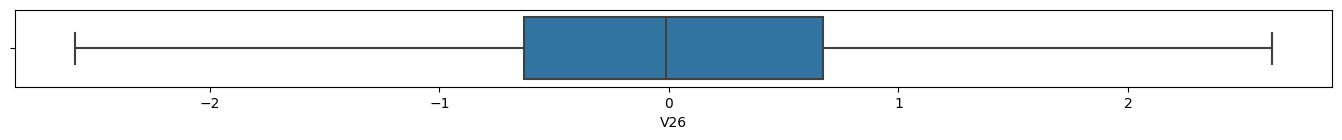

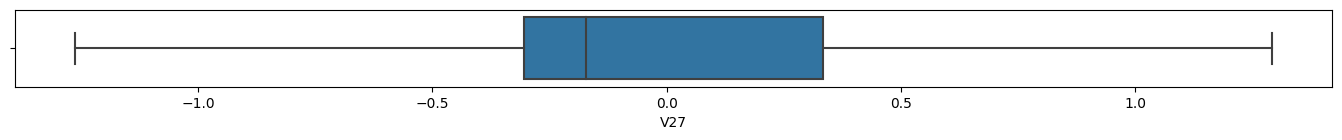

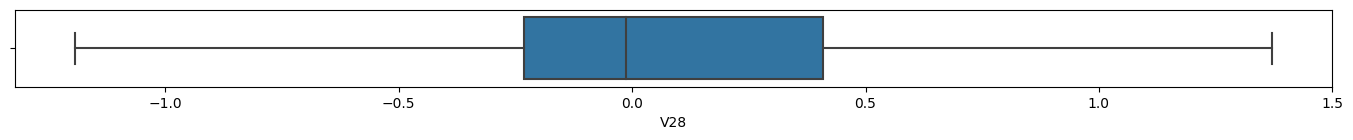

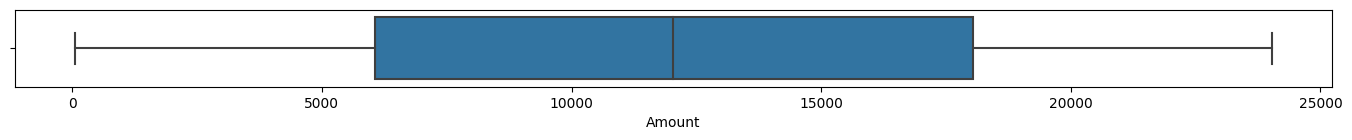

In [16]:
for column in df_temp:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df_temp, x=column)

In [17]:
df_temp['Class'] = df[['Class']]
df_temp.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.745732,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [18]:
df = df_temp
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.745732,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


#Most Important Features for Class Prediction

As the [Amount] column needs to be standardised, it contains numrical data in differrent range than the other variables

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df['Amount'] = sc.fit_transform(df[['Amount']])

Understanding the Correlation Among the Features in the Data

Text(0.5, 1.0, 'Features Correlation Plot')

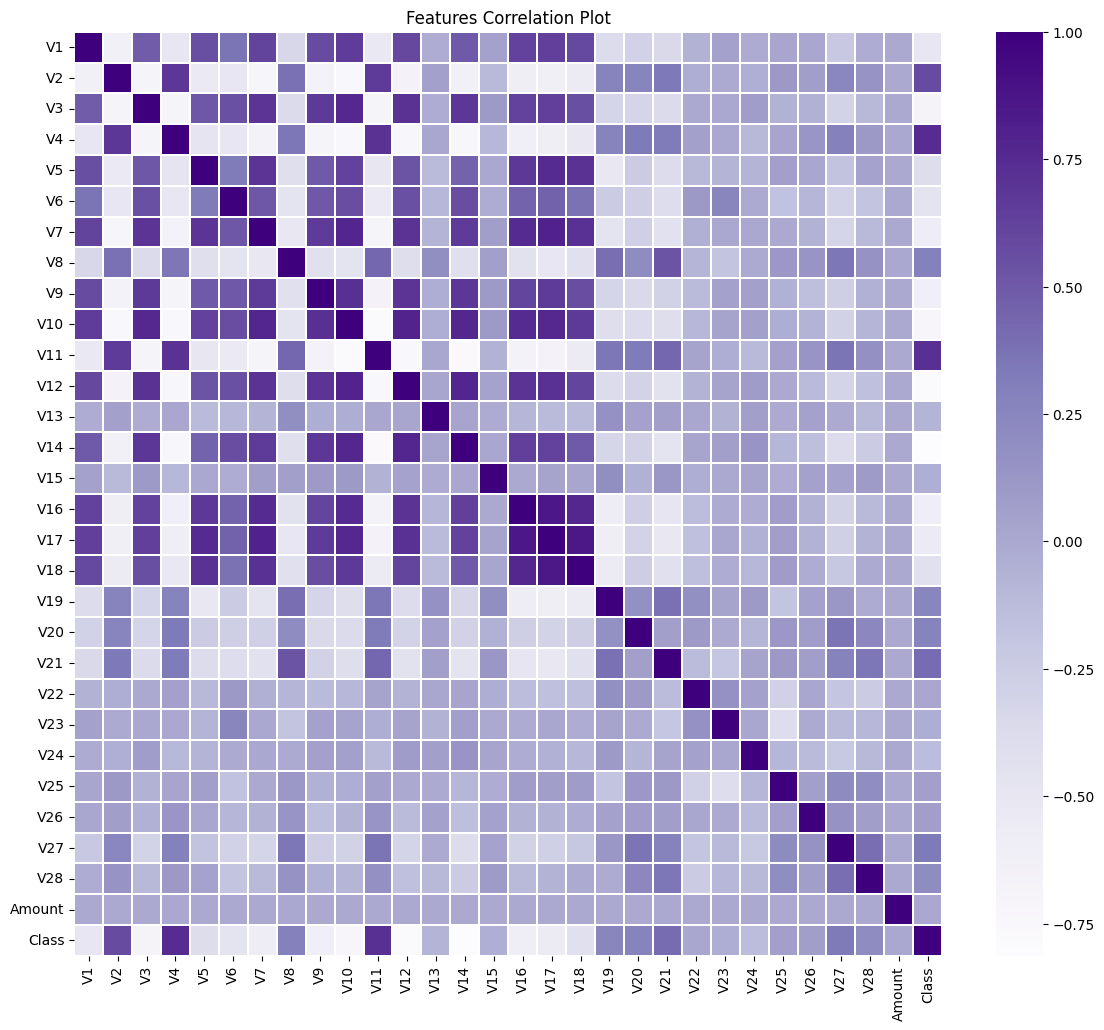

In [20]:
# Correlation plot to see the corr between variables
fig = plt.figure(figsize = (14,12))
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,linewidths=.1,cmap="Purples")
plt.title('Features Correlation Plot')

Heatmap indicating the strength and direction of the correlation between two variables.

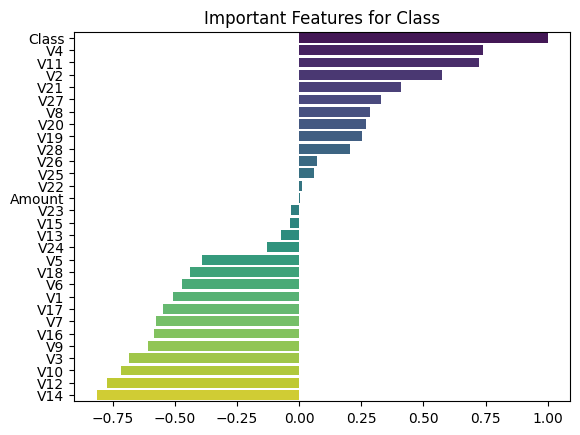

In [21]:
# Calculate correlation matrix
corr = df.corr()

# Choose your target variable (assuming 'target_variable' is your target variable)
target = "Class"

# Extract correlations with the target variable
correlations = corr[target].sort_values(ascending=False)

# Create a bar plot for the most important features
sns.barplot(x=correlations.values, y=correlations.index, palette="viridis")

# Set plot title
plt.title(f"Important Features for {target}")

# Display the plot
plt.show()

In [22]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,0.858447,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,-0.796369,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.745732,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,-1.377011,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,-0.962119,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,0.323285,0


Features showing strong co-relations i.e in more than 0.6:

In [23]:
important_features = corr.index[abs(corr['Class']) > 0.6]
important_features

Index(['V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'Class'], dtype='object')

#Dividing into Dependent and Independent Variables

In [24]:
# X = df[['V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14']]
# y = df['Class']
X = df.drop('Class', axis=1)
y = df['Class']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [26]:
X_train.shape

(398041, 29)

In [27]:
y

0         0
1         0
2         0
3         0
4         0
         ..
568625    1
568626    1
568627    1
568628    1
568629    1
Name: Class, Length: 568630, dtype: int64

In [28]:
y_train.shape

(398041,)

In [29]:
#Preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#1. Logistic Regression:

In [30]:

from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score, classification_report,precision_score,recall_score,f1_score
# Evaluate the model
print("Logistic Regression_1:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))
# Calculating and displaying additional metrics
accu_logreg = accuracy_score(y_test,y_pred_logreg)
prec_logreg = precision_score(y_test,y_pred_logreg)
recall_logreg = recall_score(y_test,y_pred_logreg)
f1_logreg = f1_score(y_test,y_pred_logreg)

Logistic Regression_1:
Accuracy: 0.9672663536335872
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     85149
           1       0.98      0.95      0.97     85440

    accuracy                           0.97    170589
   macro avg       0.97      0.97      0.97    170589
weighted avg       0.97      0.97      0.97    170589



In [32]:
print(accu_logreg)
print(prec_logreg)
print(recall_logreg)
print(f1_logreg)

0.9672663536335872
0.9799269195634406
0.9541900749063671
0.9668872601342536


The key reason for using Ridge regression is to address multicollinearity in the dataset. Multicollinearity occurs when two or more independent variables in a regression model are highly correlated

#Ridge regression

In [33]:
from sklearn.linear_model import Ridge
rid = Ridge()
rid.fit(X_train,y_train)

Ridge()

<Axes: >

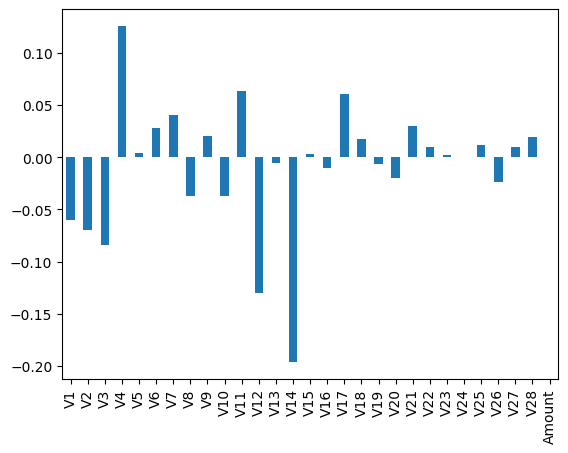

In [34]:
rd_coeff = pd.Series(rid.coef_, index=X.columns)
# rd_coeff
rd_coeff.plot(kind='bar')

In [60]:
# pred_rid = rid.predict(X_test)
# pred_rid

In [35]:
from sklearn.linear_model import Lasso
la = Lasso()
la.fit(X_train,y_train)

Lasso()

<Axes: >

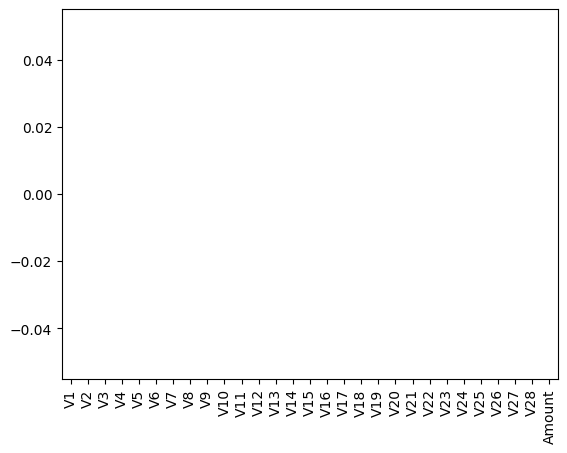

In [36]:
la_coeff = pd.Series(la.coef_,index=X.columns)
# la_coeff
la_coeff.plot(kind='bar')

In [37]:
from sklearn.linear_model import ElasticNet
elnet = ElasticNet()
elnet.fit(X_train,y_train)

ElasticNet()

<Axes: >

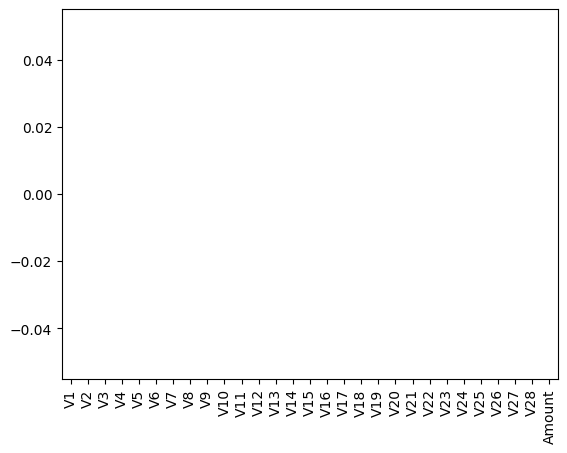

In [38]:
elnet_coeff = pd.Series(elnet.coef_, index=X.columns)
# elnet_coeff
elnet_coeff.plot(kind='bar')

selecting only features showing strong co-relations.

In [39]:
X = df[['V1', 'V2', 'V3', 'V4', 'V11', 'V12','V14','V17']]
y = df['Class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [40]:
# Increase the number of iterations
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
logreg_model = LogisticRegression(max_iter=5000)
logreg_model.fit(X_train, y_train)
y_pred_logreg2 = logreg_model.predict(X_test)
# Evaluate the model
print("Logistic Regression_2:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg2))
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg2))
accu_logreg2 = accuracy_score(y_test,y_pred_logreg2)
prec_logreg2 = precision_score(y_test,y_pred_logreg2)
recall_logreg2 = recall_score(y_test,y_pred_logreg2)
f1_logreg2 = f1_score(y_test,y_pred_logreg2)

Logistic Regression_2:
Accuracy: 0.9558588185639167
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     85149
           1       0.98      0.93      0.95     85440

    accuracy                           0.96    170589
   macro avg       0.96      0.96      0.96    170589
weighted avg       0.96      0.96      0.96    170589



In [41]:
print(accu_logreg2)
print(prec_logreg2)
print(recall_logreg2)
print(f1_logreg2)

0.9558588185639167
0.9772142594634325
0.9336376404494382
0.9549290716466152


#Performing cross vallidation on logistic regression

In [57]:
from sklearn.model_selection import KFold , cross_val_score
K_fold = KFold(n_splits= 7 , shuffle  = True ,random_state= 42)
scoring = "accuracy"
score = cross_val_score(logreg_model ,X_train,y_train, cv = K_fold , scoring= scoring)
print (score)

[0.95594675 0.95438158 0.95489158 0.95717778 0.95348469 0.95570054
 0.95526089]


In [58]:
logreg_model.fit(X_train, y_train)
y_pred_test = logreg_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy: {:.2f}%".format(100 * test_accuracy))

Test Accuracy: 95.59%


#2.DecisionTreeClassifier

In [42]:
#maximum depth
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier(max_depth=3, criterion="entropy")
dtc_model.fit(X_train, y_train)
y_pred_dtc = dtc_model.predict(X_test)
# Evaluate the model
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_dtc))
print("Classification Report:")
print(classification_report(y_test, y_pred_dtc))
accu_dtc= accuracy_score(y_test,y_pred_dtc)
prec_dtc = precision_score(y_test,y_pred_dtc)
recall_dtc = recall_score(y_test,y_pred_dtc)
f1_dtc= f1_score(y_test,y_pred_dtc)

Decision Tree Classifier:
Accuracy: 0.9449143848665505
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     85149
           1       0.99      0.90      0.94     85440

    accuracy                           0.94    170589
   macro avg       0.95      0.94      0.94    170589
weighted avg       0.95      0.94      0.94    170589



In [43]:
print(accu_dtc)
print(prec_dtc)
print(recall_dtc)
print(f1_dtc)

0.9449143848665505
0.9868995633187773
0.9019897003745319
0.9425361862421955


In [44]:
from sklearn.model_selection import GridSearchCV
# Hyperparameter Tuning using GridSearchCV
# Create a dictionary of hyperparameters to search over
parameters = {'max_depth': [5, 10, 15, 20, 25], 'min_samples_leaf': [5, 10, 15, 20, 25]}
# Create a GridSearchCV object
grid_search = GridSearchCV(dtc_model, parameters, cv=5)
# Fit the model to the training data
grid_search.fit(X_train, y_train)
# Print the best parameters and the corresponding accuracy
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)
# OUTPUT
# Best parameters: {'max_depth': 25, 'min_samples_leaf': 5}
# Best accuracy: 0.9970555785843569

Best parameters: {'max_depth': 25, 'min_samples_leaf': 5}
Best accuracy: 0.9952542579227597


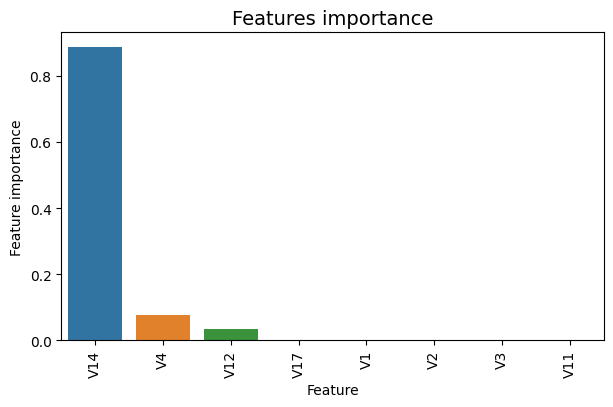

In [45]:
predictors = ['V1', 'V2', 'V3', 'V4', 'V11', 'V12','V14','V17']
# predictors = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29']
tmp = pd.DataFrame({'Feature':predictors, 'Feature importance': dtc_model.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

It provides a measure of the importance of each feature in making predictions. Features with higher importances contribute more to the model's decision-making process.

# 3.Random ForestClassifier

In [46]:

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
# Evaluate the model
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
accu_rf= accuracy_score(y_test,y_pred_rf)
prec_rf = precision_score(y_test,y_pred_rf)
recall_rf = recall_score(y_test,y_pred_rf)
f1_rf= f1_score(y_test,y_pred_rf)

Random Forest:
Accuracy: 0.9995193124996337
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



In [47]:
print(accu_rf)
print(prec_rf)
print(recall_rf)
print(f1_rf)

0.9995193124996337
0.9991695906432748
0.999871254681648
0.9995202995202995


# 4.GradientBoostingClassifier

In [48]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

gb_model = GradientBoostingClassifier(
    n_estimators=100,           # Number of boosting stages to be run
    learning_rate=0.1,          # Shrinkage parameter to control the contribution of each weak learner
    max_depth=3,                # Maximum depth of the individual trees
    min_samples_split=5,        # Minimum number of samples required to split an internal node
    min_samples_leaf=2,         # Minimum number of samples required to be at a leaf node
    subsample=0.8,              # Fraction of samples used for fitting the trees
    random_state=42
)


In [49]:
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(min_samples_leaf=2, min_samples_split=5,
                           random_state=42, subsample=0.8)

In [50]:
y_pred_gb = gb_model.predict(X_test)
# Evaluate the model
print("Gradient Boosting:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))
accu_gb= accuracy_score(y_test,y_pred_gb)
prec_gb = precision_score(y_test,y_pred_gb)
recall_gb = recall_score(y_test,y_pred_gb)
f1_gb= f1_score(y_test,y_pred_gb)

Gradient Boosting:
Accuracy: 0.9713053010452022
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     85149
           1       0.98      0.96      0.97     85440

    accuracy                           0.97    170589
   macro avg       0.97      0.97      0.97    170589
weighted avg       0.97      0.97      0.97    170589



In [51]:
print(accu_gb)
print(prec_gb)
print(recall_gb)
print(f1_gb)

0.9713053010452022
0.9807106962531482
0.9616221910112359
0.9710726463653179


In [52]:
Result_df = pd.DataFrame({"Model": ["Logistic Regression", "Logistic Regression2","DecisionTreeClassifier","RandomForestClassifier","GradientBoostingClassifier"],
                          "Accuracy_score":[accu_logreg,accu_logreg2,accu_dtc,accu_rf,accu_gb],
                          "precision":[prec_logreg,prec_logreg2,prec_dtc,prec_rf,prec_gb],
                          "recall":[recall_logreg,recall_logreg2,recall_dtc,recall_rf,recall_gb],
                          "F1_score":[f1_logreg,f1_logreg2,f1_dtc,f1_rf,f1_gb]})
Result_df

,Model,Accuracy_score,precision,recall,F1_score
0,Logistic Regression,0.967266,0.979927,0.954190,0.966887
1,Logistic Regression2,0.955859,0.977214,0.933638,0.954929
2,DecisionTreeClassifier,0.944914,0.986900,0.901990,0.942536
3,RandomForestClassifier,0.999519,0.999170,0.999871,0.999520
4,GradientBoostingClassifier,0.971305,0.980711,0.961622,0.971073


#5.Support Vector Machine (SVM)

In [53]:
#Importing Support Vector Classification (SVC) from scikit-learn
from sklearn.svm import SVC
svm_model = SVC(kernel = 'linear', random_state=0)
svm_model.fit(X_train,y_train)
y_pred_svm = svm_model.predict(X_test)
# Evaluate the model
print("SVM:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:")
print(classification_report(y_pred_svm, y_test))
accu_svm= accuracy_score(y_test,y_pred_svm)
prec_svm = precision_score(y_test,y_pred_svm)
recall_svm = recall_score(y_test,y_pred_svm)
f1_svm= f1_score(y_test,y_pred_svm)

SVM:
Accuracy: 0.9563453681069706
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.96     89544
           1       0.93      0.98      0.96     81045

    accuracy                           0.96    170589
   macro avg       0.96      0.96      0.96    170589
weighted avg       0.96      0.96      0.96    170589



In [56]:
# # Applying Grid Search to find the best parameters for the SVM model
# from sklearn.model_selection import GridSearchCV
# parameters = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1]}
# grid_search = GridSearchCV(svm_model, parameters, cv=5)
# grid_search.fit(X_train, y_train)
# # Print the best parameters and the corresponding accuracy
# print("Best parameters:", grid_search.best_params_)
# print("Best accuracy:", grid_search.best_score_)

In [54]:
print(accu_svm)
print(prec_svm)
print(recall_svm)
print(f1_svm)

0.9563453681069706
0.9811709544080449
0.9306999063670413
0.9552692434753881


In [55]:
Result_df1 = pd.DataFrame({"Model": ["Logistic Regression", "Logistic Regression2","DecisionTreeClassifier","Support Vector Machine","RandomForestClassifier","GradientBoostingClassifier"],
                          "Accuracy_score":[accu_logreg,accu_logreg2,accu_dtc,accu_svm,accu_rf,accu_gb],
                          "precision":[prec_logreg,prec_logreg2,prec_dtc,prec_svm,prec_rf,prec_gb],
                          "recall":[recall_logreg,recall_logreg2,recall_dtc,recall_svm,recall_rf,recall_gb],
                          "F1_score":[f1_logreg,f1_logreg2,f1_dtc,f1_svm,f1_rf,f1_gb]})
Result_df1

,Model,Accuracy_score,precision,recall,F1_score
0,Logistic Regression,0.967266,0.979927,0.954190,0.966887
1,Logistic Regression2,0.955859,0.977214,0.933638,0.954929
2,DecisionTreeClassifier,0.944914,0.986900,0.901990,0.942536
3,Support Vector Machine,0.956345,0.981171,0.930700,0.955269
4,RandomForestClassifier,0.999519,0.999170,0.999871,0.999520
5,GradientBoostingClassifier,0.971305,0.980711,0.961622,0.971073


In [73]:
# X1 = df[['V14']]
# y1 = df['Class']
# from sklearn.model_selection import train_test_split
# X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1,test_size=0.5,random_state=0)

In [74]:
# # Increase the number of iterations
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report
# logreg_model3 = LogisticRegression(max_iter=5000)
# logreg_model3.fit(X_train1, y_train1)
# y_pred_logreg3 = logreg_model3.predict(X_test1)
# # Evaluate the model
# print("Logistic Regression_3:")
# print("Accuracy:", accuracy_score(y_test1, y_pred_logreg3))
# print("Classification Report:")
# print(classification_report(y_test1, y_pred_logreg3))
# accu_logreg3 = accuracy_score(y_test1,y_pred_logreg3)
# prec_logreg3 = precision_score(y_test1,y_pred_logreg3)
# recall_logreg3 = recall_score(y_test1,y_pred_logreg3)
# f1_logreg3 = f1_score(y_test1,y_pred_logreg3)

Logistic Regression_3:
Accuracy: 0.9317623058931115
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93    142185
           1       0.96      0.90      0.93    142130

    accuracy                           0.93    284315
   macro avg       0.93      0.93      0.93    284315
weighted avg       0.93      0.93      0.93    284315



Conclusion:
- In conclusion, the main objective of this case study was to find the most suited model in credit card fraud detection in terms of the machine learning techniques chosen, and it was met by building the various models and finding the accuracies of them all, the best model in terms of accuracies.
- As you can see the accuracy achieved in each model, RandomForestClassifier(99%) and GradientBoostingClassifier(97%) stand out as top-performing models, with RandomForest showing particularly high scores.
- Features which have high correlation with Target 'Class' are 'V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', as seen in heatmap correlation.
